In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
car_plate = cv2.imread("DATA/car_plate.jpg")

In [3]:
car_plate = cv2.cvtColor(car_plate, cv2.COLOR_BGR2RGB)

In [4]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    fig.add_subplot(111)
    plt.imshow(img)

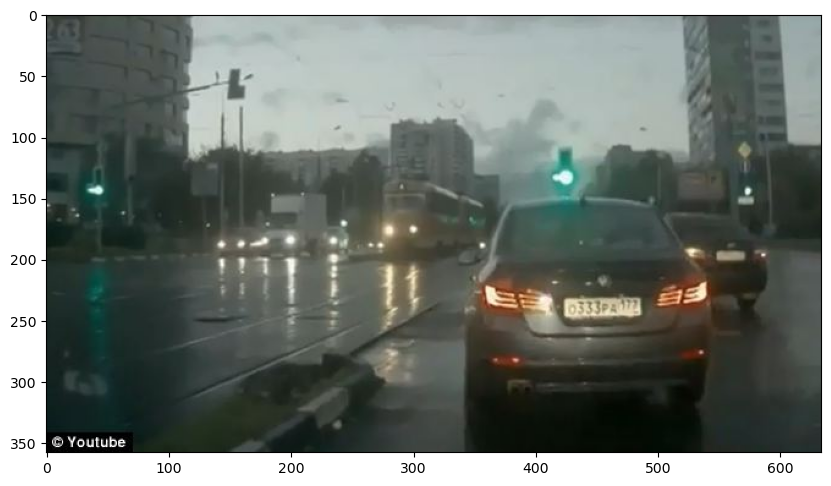

In [5]:
o_copy = car_plate.copy()
display(car_plate)

In [6]:
## draw rectangle on the carplate
haar_cascade = cv2.CascadeClassifier("DATA/haarcascades/haarcascade_russian_plate_number.xml")

In [7]:
def rectangle(img):
    img = img.copy()
    rect_cords = haar_cascade.detectMultiScale(img, scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in rect_cords:
        cv2.rectangle(img, (x,y), (x+w, y+h), color=(0,255,0), thickness = 5)
    return img, rect_cords

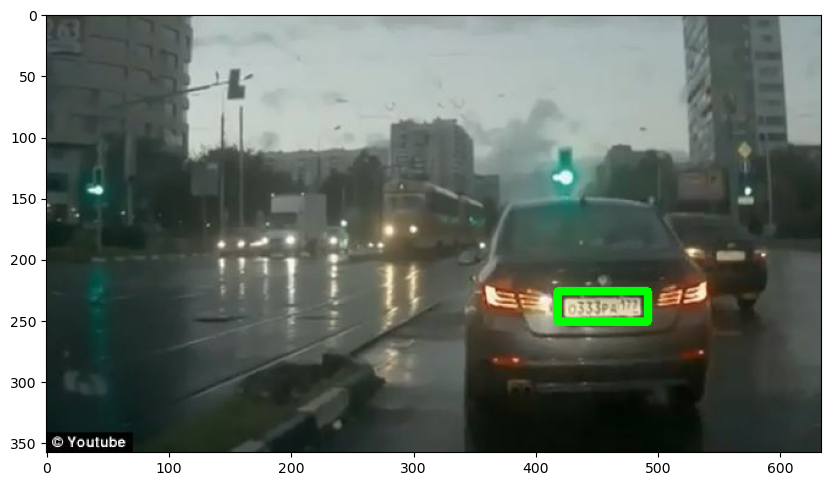

In [9]:
img, _ = rectangle(car_plate)
display(img)

In [16]:
def blur_plate(img):
    img = img.copy()
    _, cords = rectangle(img)
    for (x,y,w,h) in cords:
        roi = img[y:y+h, x:x+w, :]
        roi = cv2.medianBlur(roi, 7)
        img[y:y+h, x:x+w, :] = roi
        return img

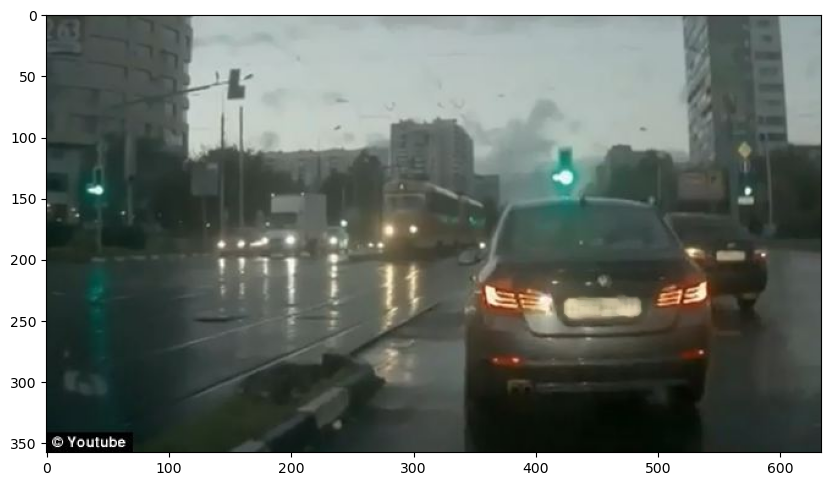

In [17]:
plate = blur_plate(o_copy)
display(plate)